# Modelagem Preditiva dos Dados do Ibovespa

Este notebook realiza a modelagem preditiva dos dados históricos do Ibovespa, utilizando um modelo de regressão linear para prever o fechamento do índice.

## Passo 1: Importar Bibliotecas Necessárias

Primeiro, vamos importar as bibliotecas que utilizaremos no processo de modelagem preditiva.


In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Passo 2: Carregar os Dados Preparados

Vamos carregar o arquivo CSV contendo os dados históricos do Ibovespa que foram preparados anteriormente.

Aqui, carregamos os dados históricos do Ibovespa a partir de um arquivo CSV. A coluna `Data` é convertida para o formato datetime para facilitar a manipulação das datas.


In [51]:
# Carregar os dados preparados
df = pd.read_csv('dados_preparados.csv')
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

# Ordenar os dados por data
df = df.sort_values(by='Data')
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Evento_Eleição Presidencial 2022,Evento_Impeachment de Dilma Rousseff,Evento_Nenhum,Evento_Pandemia de COVID-19,Evento_Recessão Econômica Brasileira,Evento_Recuperação Pós-Pandemia,Vol_log
2601,2014-01-13,49.427,49.708,50.003,49.309,2800000.0,-0.54,False,False,False,False,True,False,14.845130
2600,2014-01-14,49.703,49.421,49.834,49.263,2890000.0,0.56,False,False,False,False,True,False,14.876767
2599,2014-01-15,50.105,49.715,50.230,49.715,2840000.0,0.81,False,False,False,False,True,False,14.859315
2598,2014-01-16,49.696,50.106,50.577,49.628,2940000.0,-0.82,False,False,False,False,True,False,14.893920
2597,2014-01-17,49.182,49.696,49.868,49.174,2620000.0,-1.03,False,False,False,False,True,False,14.778685


## Passo 3: Preparar os Dados para Modelagem

Vamos selecionar as variáveis independentes (features) e a variável dependente (target) para a modelagem. Em seguida, vamos normalizar as features.

Nesta etapa, selecionamos as variáveis independentes (features) e a variável dependente (target). As features são normalizadas para garantir que todas tenham a mesma escala, o que é importante para a performance do modelo de regressão linear.


In [52]:
# Preparar os dados
features = ['Abertura', 'Vol_log', 'Evento_Eleição Presidencial 2022', 
            'Evento_Impeachment de Dilma Rousseff', 'Evento_Nenhum', 
            'Evento_Pandemia de COVID-19', 'Evento_Recessão Econômica Brasileira', 
            'Evento_Recuperação Pós-Pandemia']
X = df[features].values
y = df['Último'].values

# Normalizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Passo 4: Dividir os Dados em Treino e Teste

Vamos dividir os dados em conjuntos de treino e teste, utilizando 70% dos dados para treino e 30% para teste.

Dividimos os dados em conjuntos de treino e teste. Usamos 70% dos dados para treinar o modelo e 30% para testar o modelo. Esta divisão nos permite avaliar a performance do modelo em dados que ele não viu durante o treinamento.


In [53]:
# Dividir os dados em treino (70%) e teste (30%) usando os dados mais recentes para o teste
split_point = int(len(X_scaled) * 0.7)
X_train, X_test = X_scaled[:split_point], X_scaled[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Verificar as datas correspondentes
train_dates = df['Data'][:split_point]
test_dates = df['Data'][split_point:]

print(train_dates)
print(test_dates)

2601   2014-01-13
2600   2014-01-14
2599   2014-01-15
2598   2014-01-16
2597   2014-01-17
          ...    
785    2021-05-20
784    2021-05-21
783    2021-05-24
782    2021-05-25
781    2021-05-26
Name: Data, Length: 1821, dtype: datetime64[ns]
780   2021-05-27
779   2021-05-28
778   2021-05-31
777   2021-06-01
776   2021-06-02
         ...    
4     2024-07-08
3     2024-07-09
2     2024-07-10
1     2024-07-11
0     2024-07-12
Name: Data, Length: 781, dtype: datetime64[ns]


## Passo 5: Treinar o Modelo de Regressão Linear

Vamos treinar um modelo de regressão linear utilizando os dados de treino.

Aqui, treinamos um modelo de regressão linear usando os dados de treino. Este modelo tentará aprender a relação entre as features e o fechamento do Ibovespa.


In [54]:
# Treinar o modelo de regressão linear
model_lr_events = LinearRegression()
model_lr_events.fit(X_train, y_train)

LinearRegression()

## Passo 6: Fazer Previsões e Avaliar o Modelo

Vamos fazer previsões nos dados de teste e calcular o erro quadrático médio (MSE) e a acurácia do modelo.

Nesta etapa, utilizamos o modelo treinado para fazer previsões nos dados de teste. Calculamos o erro quadrático médio (MSE) para avaliar a performance do modelo. Também calculamos a acurácia, que indica o quão próximo o modelo está dos valores reais.


In [55]:
# Fazer previsões nos dados de teste
predictions_lr_events = model_lr_events.predict(X_test)

# Calcular o erro quadrático médio (MSE) das previsões
mse_lr_events = mean_squared_error(y_test, predictions_lr_events)
rmse_lr_events = np.sqrt(mse_lr_events)

# Calcular a acurácia
accuracy_lr_events = 1 - (rmse_lr_events / np.mean(y_test))

# Exibir a acurácia do modelo de regressão linear ajustado
print(f'RMSE: {rmse_lr_events}')
print(f'Acurácia: {accuracy_lr_events}')

RMSE: 1.3014541033483
Acurácia: 0.9887066232329674


## Passo 7: Plotar as Previsões vs. Valores Reais

Vamos plotar as previsões do modelo comparadas aos valores reais do fechamento do Ibovespa. Vamos formatar o eixo x para exibir as datas de forma clara e adicionar a unidade ao eixo y. Também vamos adicionar uma nota explicativa sobre o conjunto de dados plotado.

Este gráfico mostra as previsões do modelo comparadas aos valores reais do fechamento do Ibovespa. O gráfico cobre o período de teste (30% dos dados mais recentes). A linha azul representa os valores reais, enquanto a linha laranja representa as previsões do modelo.


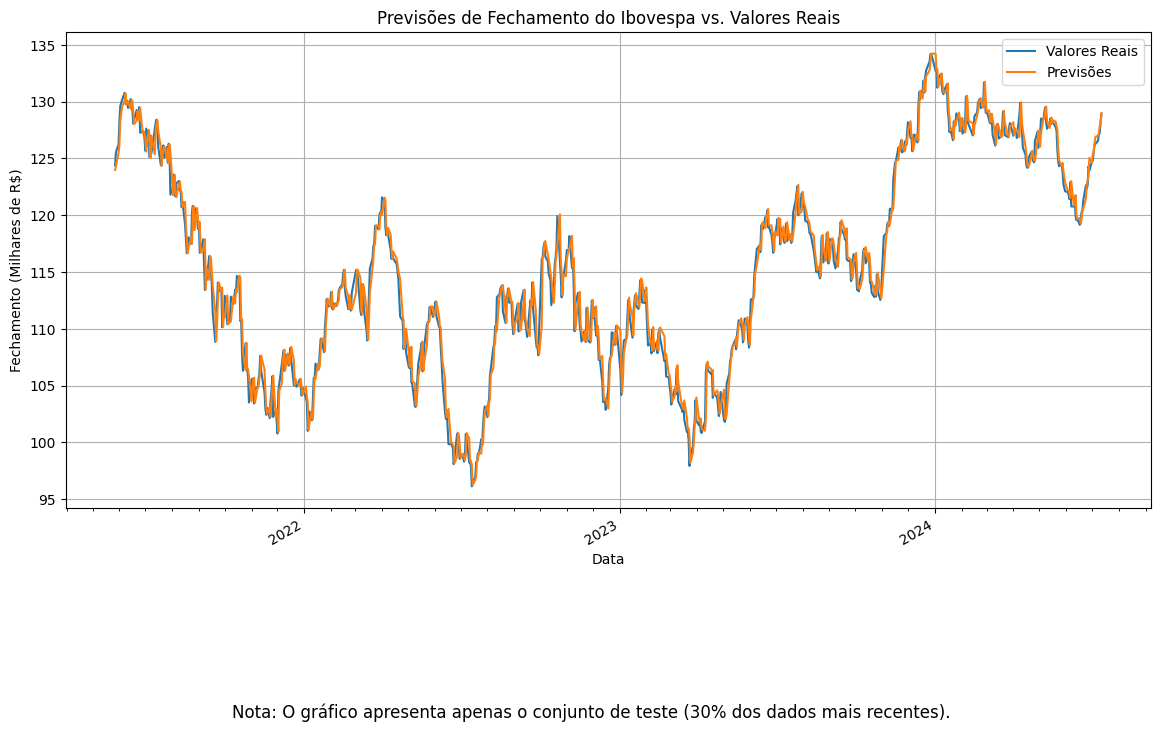

In [56]:
# Plotar as previsões vs. valores reais
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test, label='Valores Reais')
plt.plot(test_dates, predictions_lr_events, label='Previsões')

# Formatar o eixo x para melhorar a legibilidade das datas
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

# Adicionar unidades ao eixo y
plt.ylabel('Fechamento (Milhares de R$)')

# Adicionar título e rótulos
plt.xlabel('Data')
plt.title('Previsões de Fechamento do Ibovespa vs. Valores Reais')

# Adicionar nota explicativa
plt.figtext(0.5, -0.1, "Nota: O gráfico apresenta apenas o conjunto de teste (30% dos dados mais recentes).", ha="center", fontsize=12)

plt.legend()
plt.grid(True)
plt.show()